#TALKPAY

In [137]:
import tweepy
import json
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
sns.set(style='ticks', palette='Set2')
%matplotlib inline
 
# Consumer keys and access tokens, used for OAuth - insert your keys
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''
 
# OAuth process, using the keys and tokens
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
 
# Creation of the actual interface, using authentication
api = tweepy.API(auth)

In [ ]:
c = tweepy.Cursor(api.search, q='talkpay')
c_iter = c.items()
all_text = []
for tweet in c_iter:
    all_text.append(tweet.text)

I do probably the most naive approach to extracting the data I want. I just pull out the digits that fall in between \$ and k. For example, $125k returns 125. This obviously doesn't get all the data and even gets some data we might not care about. For example, some people put multiple salaries over time, for which we maybe only want the most recent. For the sake of quickness and getting more data, I include everything my naive approach finds.

In [152]:
thous_dollars_raw = [re.findall(r'\$(\d*)[k|K]', t, re.DOTALL | re.MULTILINE) for t in all_text]
thous_dollars = []
for dollar in thous_dollars_raw:
    if len(dollar) > 0:
        for d in dollar:
            thous_dollars.append(int(d))
thous_dollars = np.array(thous_dollars)

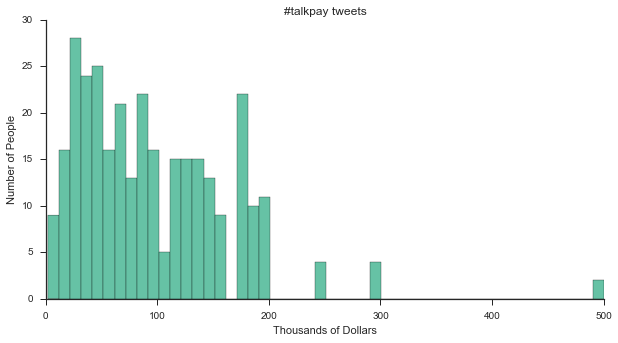

In [154]:
plt.figure(figsize=(10,5))
plt.hist(thous_dollars, bins=50)
plt.xlabel("Thousands of Dollars")
plt.ylabel("Number of People")
plt.title("#talkpay tweets")
sns.despine()

In [142]:
pd_series = pd.Series(thous_dollars)
pd_series.describe()

count    315.000000
mean      96.530159
std       69.642089
min        2.000000
25%       42.000000
50%       84.000000
75%      135.000000
max      500.000000
dtype: float64

It looks like we got 315 salaries from our approach - not too bad. Also, the median salary comes out to be \$84k with the mean being pulled up to \$96.5k from the few large outliers we have. Virtually all of our data falls below \$200k and 75 percent of it below \$135k. 

So - it is kind of interesting to look at this data. I would be very hesitant to really infer much given the nature of the data and my naive way of extracting it. But still a fun, quick side project :)